In [1]:
import numpy as np
from nilearn import image

# Load power template coords
powerfile = '/home/anton/Documents/Tulane/Hackathon/power264/power264MNI.nii.gz'

powerimg = image.load_img(powerfile)
datpower = image.get_data(powerimg)

print(datpower.shape)

(91, 109, 91)


In [2]:
# Sort power coordinates

pcoords = []
proinums = []

for roi in range(264):
    x,y,z = np.where(datpower == roi+1)
    pcoords.append(np.stack([x,y,z,np.ones(x.shape[0])]).T)
    proinums.append(roi*np.ones(x.shape[0]))
    
pcoords = np.concatenate(pcoords).T
proinums = np.concatenate(proinums)

print(pcoords.shape)
print(proinums.shape)

(4, 21384)
(21384,)


In [11]:
# Get fibromyalgia TS

basedir = '/home/anton/Documents/Tulane/Hackathon/ds004144-out/'

from pathlib import Path
import re
from scipy.interpolate import interpn

def extract_ts(imgname):
    # Load the nii image
    img = image.load_img(imgname)
    img = image.smooth_img(img, 5)
    datimg = image.get_data(img)

    # Transform coords from power image space to nii image space
    coords = np.linalg.inv(img.affine)@powerimg.affine@pcoords
    points = [np.arange(s) for s in img.shape[:-1]]

    # Set up data structures
    nt = datimg.shape[-1]
    ts = np.zeros((264,nt))
    res = np.zeros((nt,coords.shape[-1]))

    # Interpolate fractional coords
    for tp in range(nt):
        res[tp] = interpn(points, datimg[:,:,:,tp], coords[:-1].T, bounds_error=True)

    # Each roi composed of mean of a ball of coordinates
    for roi in range(264):
        ts[roi] = np.mean(res[:,proinums == roi], axis=1)
        
    return ts

eprdict = dict()
restdict = dict()

for d in Path(basedir).iterdir():
    m = re.match('sub-(\d+)', d.name)
    if not d.is_dir() or not m:
        continue
    func = d / 'func'
    if not func.exists():
        continue
    sub = m.group(1)
    epr = func / f'sub-{sub}_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
    rest = func / f'sub-{sub}_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
    if epr.exists():
        ts = extract_ts(str(epr))
        eprdict[int(sub)] = ts
        print(f'Finished {epr}')
    if rest.exists():
        ts = extract_ts(str(rest))
        restdict[int(sub)] = ts
        print(f'Finished {rest}')
        
print('Complete')

Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-037/func/sub-037_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-037/func/sub-037_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-076/func/sub-076_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-076/func/sub-076_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-019/func/sub-019_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-019/func/sub-019_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-069/func/sub-069_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Fin

Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-075/func/sub-075_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-075/func/sub-075_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-066/func/sub-066_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-066/func/sub-066_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-005/func/sub-005_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-013/func/sub-013_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-013/func/sub-013_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Fi

Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-054/func/sub-054_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-073/func/sub-073_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-073/func/sub-073_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-059/func/sub-059_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-059/func/sub-059_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-034/func/sub-034_task-epr_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Finished /home/anton/Documents/Tulane/Hackathon/ds004144-out/sub-034/func/sub-034_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
Fi

In [12]:
print(restdict[2].shape)
print(eprdict[2].shape)

(264, 300)
(264, 775)


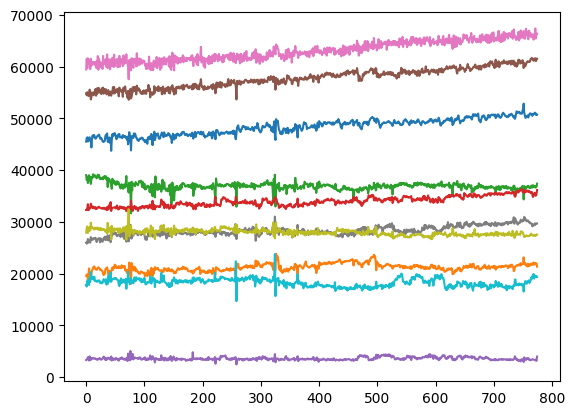

In [15]:
# Check unfiltered

import matplotlib.pyplot as plt

plt.plot(eprdict[2][0:10].T)
plt.show()

In [17]:
# Save unfiltered

import pickle

dct = dict(epr=eprdict, rest=restdict)

pickle.dump(dct, open('/home/anton/Documents/Tulane/Research/AngleBasis/data/ds004144_raw_ts.pkl', 'wb'))

print('Done')

Done


In [18]:
# Filter data

from scipy import signal

def butter_bandpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = [cutoff[0] / nyq, cutoff[1] / nyq]
    b, a = signal.butter(order, normal_cutoff, btype='band', analog=False)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

filtdict = dict(epr=dict(), rest=dict())

tr = 2

for task in ['epr', 'rest']:
    for sub in dct[task]:
        filt_ts = butter_bandpass_filter(dct[task][sub], [0.01, 0.15], 1/tr)
        filtdict[task][sub] = filt_ts

print('Done')

Done


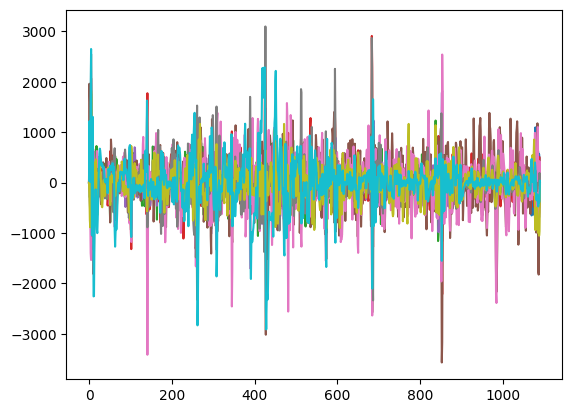

In [22]:
# Check filtered

import matplotlib.pyplot as plt

plt.plot(filtdict['epr'][3][0:10].T)
plt.show()

In [23]:
# Save filtered

import pickle

pickle.dump(filtdict, open('/home/anton/Documents/Tulane/Research/AngleBasis/data/ds004144_filt_ts.pkl', 'wb'))

print('Done')

Done


In [25]:
# Check Pearson

fc = dict(epr=dict(), rest=dict())

for task in ['epr', 'rest']:
    for sub in filtdict[task]:
        p = np.corrcoef(filtdict[task][sub])
        fc[task][sub] = p

print('Done')

Done


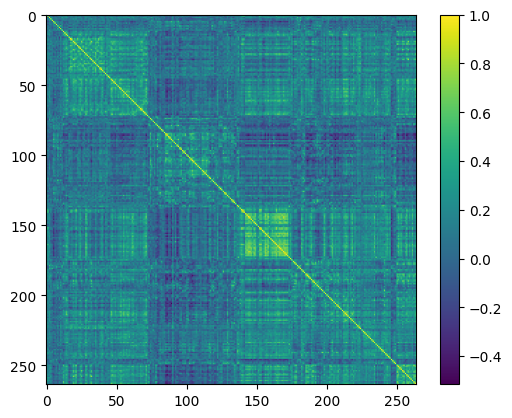

In [37]:
# Check Pearson again

plt.imshow(fc['rest'][10])
plt.colorbar()
plt.show()

In [38]:
# Save Pearson

import pickle

pickle.dump(fc, open('/home/anton/Documents/Tulane/Research/AngleBasis/data/fc.pkl', 'wb'))

print('Done')

Done


In [39]:
# Save vectorized Pearson

a,b = np.triu_indices(264, 1)

fcvec = dict(epr=dict(), rest=dict())

for task in fc:
    for sub in fc[task]:
        pvec = fc[task][sub][a,b]
        fcvec[task][sub] = pvec.astype('float')
        
pickle.dump(fcvec, open('/home/anton/Documents/Tulane/Research/AngleBasis/data/fcvec.pkl', 'wb'))

print('Done')

Done
